<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/Capstone_edX/Module%203/Survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

C:\Users\ladan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


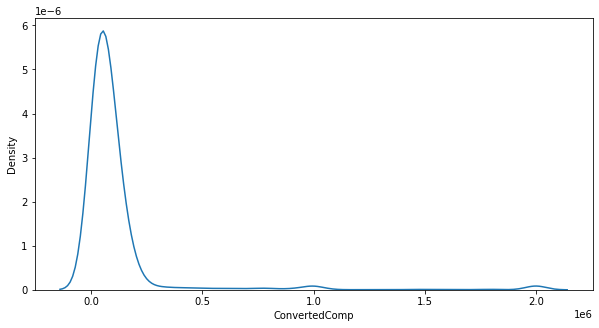

In [11]:
# your code goes here
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,hist=False)
plt.show()

Plot the histogram for the column `ConvertedComp`.


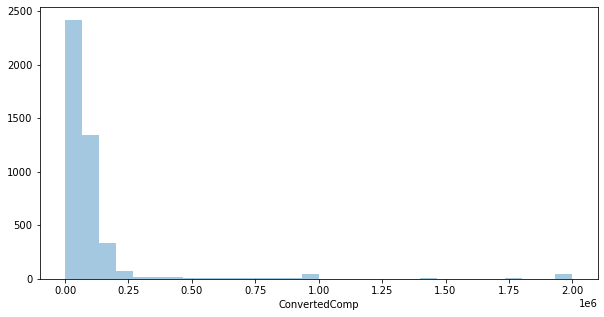

In [14]:
# your code goes here
plt.figure(figsize = (10,5))
sns.distplot(a=df["ConvertedComp"],bins=30,kde = False)
plt.show()

What is the median of the column `ConvertedComp`?


In [15]:
# your code goes here
df["ConvertedComp"].median()

60505.0

How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
df["Gender"].value_counts()

Man                                                            4184
Woman                                                           171
Non-binary, genderqueer, or gender non-conforming                18
Man;Non-binary, genderqueer, or gender non-conforming             9
Woman;Non-binary, genderqueer, or gender non-conforming           2
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Woman;Man                                                         1
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
# your code goes here
Woman = df[df["Gender"] == "Woman"]
Woman["ConvertedComp"].median()

59454.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
# your code goes here
df["Age"].describe()

count    4387.000000
mean       31.950308
std         7.357480
min        17.000000
25%        27.000000
50%        30.000000
75%        36.000000
max        70.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


C:\Users\ladan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


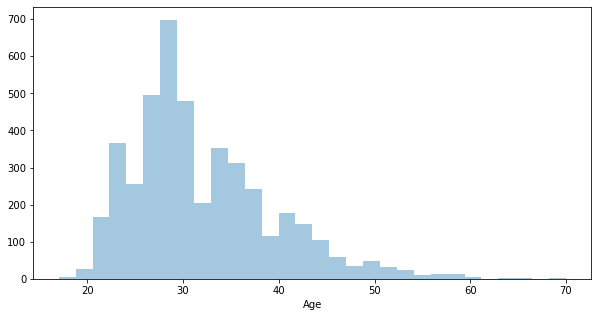

In [22]:
# your code goes here
plt.figure(figsize = (10,5))
sns.distplot(df["Age"], bins = 30, kde = False)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


C:\Users\ladan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


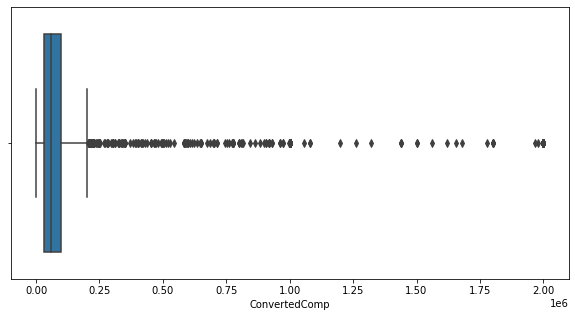

In [25]:
# your code goes here
plt.figure(figsize = (10,5))
sns.boxplot(df["ConvertedComp"], data = df)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [26]:
# your code goes here
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
IQR

69844.0

Find out the upper and lower bounds.


In [27]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
lower_bound = Q1 -1.5 * IQR
print(lower_bound)

204766.0
-74610.0


Identify how many outliers are there in the `ConvertedComp` column.


In [28]:
# your code goes here
total_outlier = (df["ConvertedComp"] > upper_bound) | (df["ConvertedComp"] < lower_bound)
total_outlier.value_counts()

False    4121
True      266
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [37]:
# your code goes her

x = df['ConvertedComp'].clip(lower = lower_bound, upper = upper_bound)
df_new = df[df["ConvertedComp"] == x]
df_new["ConvertedComp"].mean()

pd.DataFrame(df_new)

,Unnamed: 0,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,...,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro,NormalizedAnnualCompensation
0,9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,...,Appropriate in length,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4,25000.0
1,32,33,I am a developer by profession,Yes,39.0,14,Monthly,4900.0,63564.0,Belgium,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;Gatsby;React.js;Ruby on Rails,Angular;Angular.js;Django;Express;React.js,Just as welcome now as I felt last year,40.0,20,14,58800.0
2,41,42,I am a developer by profession,No,32.0,14,Yearly,130000.0,130000.0,United States,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core;Spring,ASP.NET;Flask;React.js;Spring,Somewhat less welcome now than last year,37.0,16,10,130000.0
3,46,47,I am a developer by profession,Yes,53.0,10,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43,28,58000.0
5,79,80,I am a developer by profession,Yes,32.0,11,Yearly,94500.0,94500.0,United States,...,Too long,No,"Information systems, information technology, o...",Angular;ASP.NET Core,Angular;ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,40.0,21,7,94500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,61636,62886,I am a developer by profession,Yes,32.0,24,Yearly,102700.0,102700.0,United States,...,Appropriate in length,No,"Information systems, information technology, o...",Angular,Angular;Angular.js;ASP.NET Core,Somewhat more welcome now than last year,45.0,7,5,102700.0
4383,61654,62904,I am a developer by profession,Yes,33.0,24,Yearly,95000.0,95000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;Laravel;React.js;Vue.js,Just as welcome now as I felt last year,50.0,9,7,95000.0
4384,61993,63288,I am a developer by profession,No,31.0,16,Yearly,65000.0,84019.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;Angular.js;Express,Angular;Angular.js;Express,Just as welcome now as I felt last year,40.0,14,7,65000.0
4385,63141,64523,I am a developer by profession,No,29.0,15,Monthly,8500.0,23364.0,Brazil,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular;ASP.NET;ASP.NET Core;React.js;Vue.js,ASP.NET;ASP.NET Core;jQuery,Somewhat more welcome now than last year,40.0,19,17,102000.0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [42]:
# your code goes here
df_new.corr()

,Unnamed: 0,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs,NormalizedAnnualCompensation
Unnamed: 0,1.000000,0.999946,-0.005234,-0.015208,-0.046861,0.008900,-0.010014
Respondent,0.999946,1.000000,-0.004477,-0.015409,-0.045668,0.008952,-0.010486
Age,-0.005234,-0.004477,1.000000,0.004256,0.408841,0.031855,-0.023207
CompTotal,-0.015208,-0.015409,0.004256,1.000000,-0.027768,0.022866,0.545670
ConvertedComp,-0.046861,-0.045668,0.408841,-0.027768,1.000000,0.075061,-0.076920
WorkWeekHrs,0.008900,0.008952,0.031855,0.022866,0.075061,1.000000,0.021888
NormalizedAnnualCompensation,-0.010014,-0.010486,-0.023207,0.545670,-0.076920,0.021888,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
